In [18]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [19]:
import os
from os.path import join
cwd = os.getcwd()
parts = cwd.split('/scripts/custom')
ROOT = parts[0]
os.chdir(ROOT)
import sys
sys.path.insert(0, ROOT)

In [34]:
RES = join(ROOT, 'data', 'custom', 'results')
figs_folder = join(RES, 'figs')

In [36]:
if not os.path.isdir(figs_folder):
    os.mkdir(figs_folder)

In [37]:
import pandas as pd
import pickle
from time import time
import torch
import numpy as np
from matplotlib import pyplot as plt
from tqdm import tqdm

### Training history

In [38]:
file = open(join(RES, "training_data"), 'rb')
T = pickle.load(file)

Text(0.5, 1.0, 'Acc')

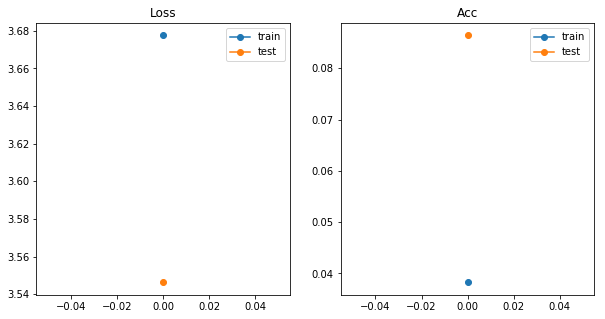

In [39]:
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
plt.plot(T['train_loss'],'-o', label='train')
plt.plot(T['test_loss'],'-o', label='test')
plt.legend()
plt.title('Loss')
plt.subplot(1,2,2)
plt.plot(T['train_acc'],'-o', label='train')
plt.plot(T['test_acc'],'-o', label='test')
plt.legend()
plt.title('Acc')

In [40]:
n_out_class=40
layers = ['input', 'pool1', 'pool2', 'pool3', 'pool4', 'pool5', 'd1', 'd2', 'output']
embdims = np.array([150528, 802816, 401408, 200704, 100352, 25088, 4096, 4096, n_out_class]) 

In [41]:
ID = np.load(join(RES,'ID_all.npy'))

In [42]:
ID

array([[30.80323085,  0.5679306 ],
       [71.16656127,  2.35549735],
       [63.93647035,  1.95946101],
       [47.14047684,  1.1891793 ],
       [21.35534339,  0.59510438],
       [12.671918  ,  0.33548192],
       [ 8.0706275 ,  0.14113439],
       [ 6.69486056,  0.13555176],
       [ 5.32851088,  0.10240902]])

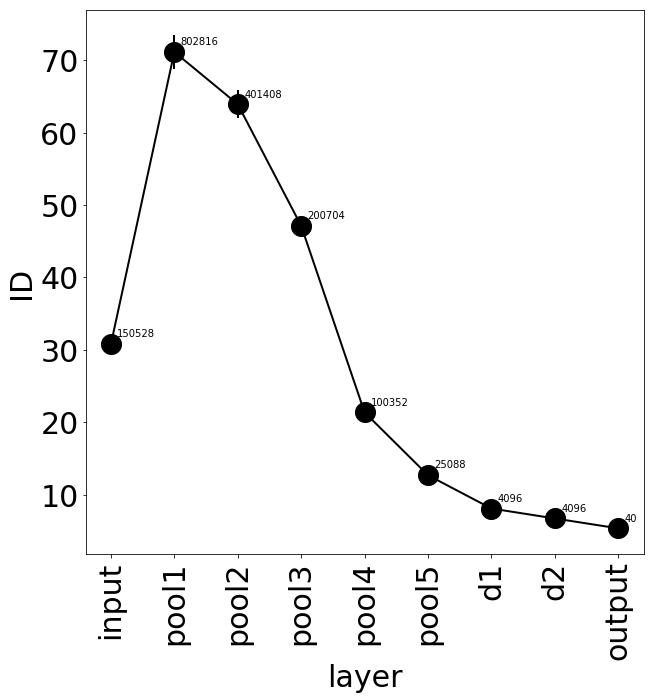

In [43]:
ms = 20
fs = 30
lw = 2

fig = plt.figure(figsize=(10,10))
plt.errorbar(range(len(layers)),ID[:,0],yerr=ID[:,1],fmt='-ko',linewidth=lw,
            markersize=ms)

# text of numbers
for i in range(len(layers)):
    plt.text(i + 0.1, ID[i,0] + 1, str(embdims[i]),fontsize=10)

plt.xticks(range(len(layers)), layers, rotation='vertical',fontsize=fs )
plt.yticks(fontsize=fs)
plt.xlabel('layer',fontsize=fs)
plt.ylabel('ID',fontsize=fs)

plt.savefig(join(figs_folder, 'id_layers_naked.png'))

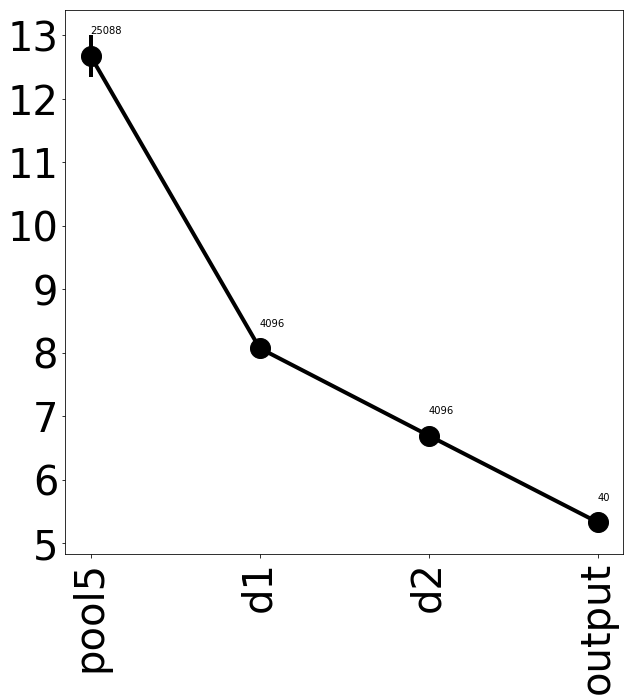

In [44]:
fs = 40
ms = 20
lw = 4
off = 0.35

fig = plt.figure(figsize=(10,10))
plt.errorbar(range(5,len(layers)),ID[5:,0],yerr=ID[5:,1],
         fmt='-ko',linewidth=lw,markersize=ms)

for i in range(5,len(layers)):   
    plt.text(i , ID[i,0] + off, str(embdims[i]), fontsize=10)

plt.xticks(range(5,len(layers)), layers[5:], rotation='vertical',fontsize=fs )
plt.yticks(fontsize=fs)

plt.savefig(join(figs_folder, 'id_layers_inset.png'))

# Block analysis

In [45]:
BA = np.load(join(RES, 'BA.npy'))
n_points = BA[0][2]
n_points

array([1440.,  720.,  480.,  360.,  288.,  240.,  205.,  180.,  160.,
        144.,  130.,  120.,  110.,  102.,   96.,   90.,   84.,   80.,
         75.,   72.])

In [46]:
fs = 30
ms = 10
lw = 1
import itertools
sel = [list(range(4)),[5],[9],[15]]
merged = list(itertools.chain.from_iterable(sel))
nps = [n_points[x] for x in merged]

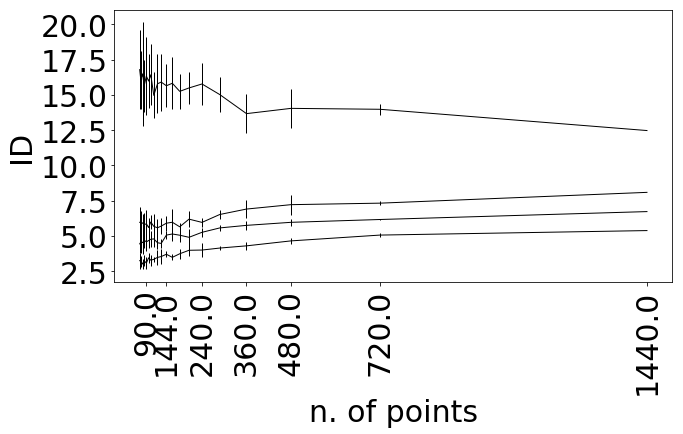

In [50]:
fig = plt.figure(figsize=(10,5))
for i in range(4):
    plt.errorbar(n_points,BA[i][0],
                 yerr=BA[i][1],
                 fmt='-k',
                 linewidth=lw,
                 markersize=ms)
    
plt.ylabel('ID',fontsize=fs)
plt.yticks(fontsize=fs)
plt.xticks(nps, nps, rotation=90, fontsize=fs)
plt.xlabel('n. of points',fontsize=fs)

plt.savefig(join(figs_folder, 'ba.png'))